# Weather.py

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pprint 
import scipy.stats as sts

#Import API key
from api_keys import weather_api_key

from citipy import citipy

output_data_file_csv = "output_data/city_data.csv"

#Range of latitudes and longitudes
lat_range=(-100,100)
lng_range=(-200,200)


Generate City List


In [2]:
#Creating empty lists to store
lat_lngs=[]
cities=[]

#Creating random combinations within lat and lng range
lats=np.random.uniform(low=-100,high=100, size=1500)
lngs=np.random.uniform(low=-200,high=200, size=1500)
lat_lngs=zip(lats,lngs)

#Identifying the cities 
for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)


532

Performing API Calls

In [11]:
#Save config information 
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

#Build query 
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Creating lists to store tthe response information
city_name=[]
country=[]
latitude=[]
longitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]


record=1

print(f"Beginning Data Retrieval")
print(f"------------------------")

#Looping through to list of cities and performing the request on each
for city in cities:
    
    try:
        response_data=requests.get(query_url+city).json()
        
        city_name.append(response_data['name'])
        country.append(response_data['sys']['country'])
        latitude.append(response_data['coord']['lat'])
        longitude.append(response_data['coord']['lon'])
        temperature.append(response_data['main']['temp_max'])
        humidity.append(response_data['main']['humidity'])
        cloudiness.append(response_data['clouds']['all'])
        wind_speed.append(response_data['wind']['speed'])
        date.append(response_data['dt'])
        
        name=response_data['name']
        print(f"Processing Record {record}|{name}")

        #Increase counter each time
        record=record+1

    except KeyError: 
        print("City not found.. Skipping")
    continue
    

Beginning Data Retrieval
------------------------
Processing Record 1|Sorokyne
Processing Record 2|Cape Town
Processing Record 3|Saint-Pierre
Processing Record 4|Bluff
Processing Record 5|Chinchani
Processing Record 6|Butaritari
Processing Record 7|Kurikka
Processing Record 8|Bismarck
Processing Record 9|Dharapuram
Processing Record 10|Egvekinot
Processing Record 11|Santa Marta
Processing Record 12|Kapaa
Processing Record 13|Duncan
Processing Record 14|Barrow
Processing Record 15|Iqaluit
City not found.. Skipping
Processing Record 16|Vaini
Processing Record 17|Mataura
Processing Record 18|Qaanaaq
City not found.. Skipping
Processing Record 19|Hobart
Processing Record 20|Chokurdakh
Processing Record 21|Cap-aux-Meules
Processing Record 22|La Palma
Processing Record 23|Sinnamary
Processing Record 24|Opuwo
Processing Record 25|Acuitzio
Processing Record 26|Navahrudak
Processing Record 27|Yellowknife
Processing Record 28|Kalemie
Processing Record 29|Kruisfontein
City not found.. Skipping
Pr

Processing Record 242|Beira
Processing Record 243|Buraidah
Processing Record 244|Acaraú
Processing Record 245|Loíza
Processing Record 246|Morondava
Processing Record 247|Baghdad
Processing Record 248|Laguna
City not found.. Skipping
Processing Record 249|Maceió
Processing Record 250|Yakeshi
Processing Record 251|Garissa
Processing Record 252|Mount Isa
Processing Record 253|Fairbanks
Processing Record 254|Mayo
Processing Record 255|Nuuk
Processing Record 256|Cabras
Processing Record 257|Belyy Yar
Processing Record 258|Panevezys
Processing Record 259|Ceres
Processing Record 260|Talnakh
Processing Record 261|Natal
Processing Record 262|Ixtapa
Processing Record 263|Nago
Processing Record 264|Tuatapere
Processing Record 265|Caucayá
Processing Record 266|Port Said
Processing Record 267|Micheweni
Processing Record 268|Sorong
Processing Record 269|Yangambi
Processing Record 270|Safi
Processing Record 271|Las Palmas
Processing Record 272|Ponta Delgada
Processing Record 273|Port Macquarie
Proces

Processing Record 487|Prado
Processing Record 488|Bang Rakam
Processing Record 489|Ust'-Kulom


Convert Raw Data to DataFrame

In [12]:
weather_df=pd.DataFrame({"City":city_name,
                        "Lat":latitude,
                        "Lng":longitude,
                        "Max Temp": temperature,
                        "Humidity": humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country,
                        "Date":date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorokyne,48.2923,39.7373,41.05,37,2,7.81,UA,1635169600
1,Cape Town,-33.9258,18.4232,79.11,52,0,5.99,ZA,1635169399
2,Saint-Pierre,-21.3393,55.4781,78.48,70,90,9.22,RE,1635169602
3,Bluff,-46.6000,168.3333,52.88,93,100,9.75,NZ,1635169603
4,Chinchani,19.8667,72.7000,79.56,73,0,7.90,IN,1635169603
...,...,...,...,...,...,...,...,...,...
484,Itigi,-5.7000,34.4833,90.77,17,67,11.32,TZ,1635170091
485,Acapulco de Juárez,16.8634,-99.8901,77.02,87,100,5.03,MX,1635169965
486,Prado,-17.3411,-39.2208,80.87,80,98,7.25,BR,1635170092
487,Bang Rakam,16.7585,100.1174,78.80,94,20,0.00,TH,1635170094


In [13]:
#Removing cities with humidity >100%
data_df=weather_df.loc[(weather_df["Humidity"]<=100)]
data_df

#Exporting data to csv file
data_df.to_csv(output_data_file_csv, index=False)

Plotting the Data

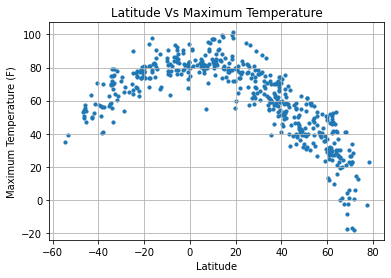

In [14]:
#Latitude Vs Temperature
plt.scatter(data_df["Lat"],data_df["Max Temp"],marker="o",s=10)

plt.title("Latitude Vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)

plt.show()


The scatterplot above shows a relatively weak correlation between both laititude and temperature of specified. Just by eyeing the points, there could be a possible linear relationship between the city's latitiude and the maximum temperature.

Latitude Vs Humidity

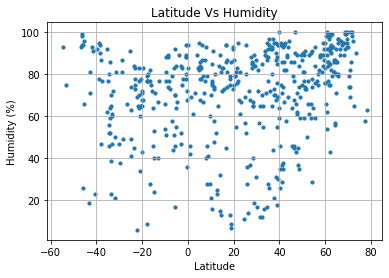

In [15]:
plt.scatter(data_df["Lat"],data_df["Humidity"],marker="o",s=10)

plt.title("Latitude Vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

The scatterplot above demonstrates the relationship between latitude and humitdity of specific cities. The distribution is widely spread out and suggests there may be little to no correlation between the two variables

Latitude Vs Cloudiness

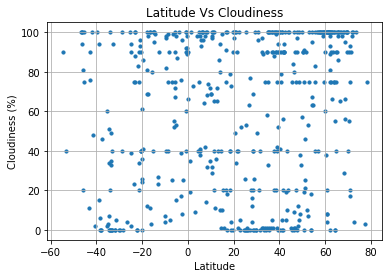

In [16]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"],marker="o",s=10)

plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

The relationship between latitiude and cloudiness is demonstrated here. Similar to laitidue vs humidity, there appears to not be a correlation between the two variables

Latitude Vs Wind Speed

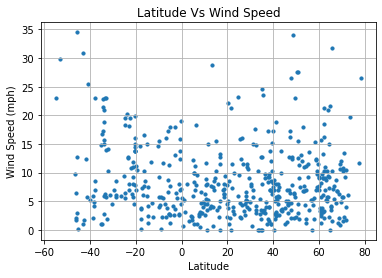

In [17]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"],marker="o",s=10)

plt.title("Latitude Vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.show()

This scatterplot shows the relationship between laitiude and wind speed of several different cities. At first glance there could be a weak correlation between the variables with several outliers

# Linear Regression

In [18]:
import scipy.stats as sts

#Creating northern and southern hemisphere DataFrames
north_df=data_df.loc[(data_df["Lat"]>0)]
south_df=data_df.loc[(data_df["Lat"]<0)]


Northern Hemisphere: Maximum Temperature vs Latitude

The r-value:-0.8841542271732319


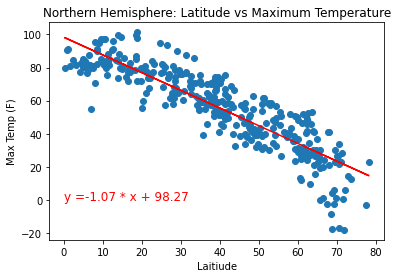

In [19]:
#Plotting Northern hemisphere scatterplot
plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.title("Northern Hemisphere: Latitude vs Maximum Temperature")
plt.xlabel("Laitiude")
plt.ylabel("Max Temp (F)")

#Finding correlation value
r_value=sts.pearsonr(north_df["Lat"],north_df["Max Temp"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=north_df["Lat"]
y=north_df["Max Temp"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
temp_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(0,0),fontsize=12,color="red")
plt.plot(x,temp_predicted,color="red")

plt.show()

Southern Hemisphere: Maximum Temperature vs Laititude

The r-value:0.7837503208593192


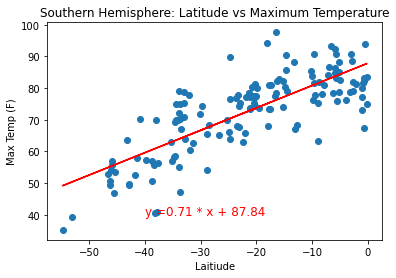

In [20]:
#Plotting southern hemisphere scatterplot
plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.title("Southern Hemisphere: Latitude vs Maximum Temperature")
plt.xlabel("Laitiude")
plt.ylabel("Max Temp (F)")

#Finding correlation value
r_value=sts.pearsonr(south_df["Lat"],south_df["Max Temp"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=south_df["Lat"]
y=south_df["Max Temp"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
temp_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(-40,40),fontsize=12,color="red")
plt.plot(x,temp_predicted,color="red")

plt.show()

Northern Hemisphere: Humidity vs Latitude

The r-value:0.30494378741812894


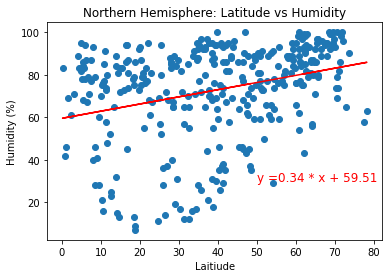

In [21]:
#Plotting Northern hemisphere scatterplot
plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.title("Northern Hemisphere: Latitude vs Humidity")
plt.xlabel("Laitiude")
plt.ylabel("Humidity (%)")

#Finding correlation value
r_value=sts.pearsonr(north_df["Lat"],north_df["Humidity"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=north_df["Lat"]
y=north_df["Humidity"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
humidity_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(50,30),fontsize=12,color="red")
plt.plot(x,humidity_predicted,color="red")

plt.show()

Southern Hemisphere: Humidity vs Latitude

The r-value:-0.03160557508666779


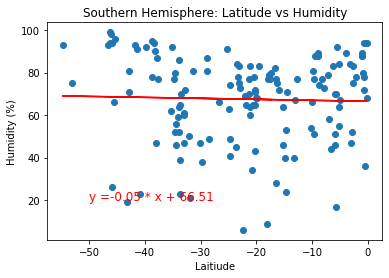

In [22]:
#Plotting southern hemisphere scatterplot
plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.title("Southern Hemisphere: Latitude vs Humidity")
plt.xlabel("Laitiude")
plt.ylabel("Humidity (%)")

#Finding correlation value
r_value=sts.pearsonr(south_df["Lat"],south_df["Humidity"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=south_df["Lat"]
y=south_df["Humidity"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
humidity_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(-50,20),fontsize=12,color="red")
plt.plot(x,humidity_predicted,color="red")

plt.show()

Northern Hemisphere: Cloudiness vs Latitude

The r-value:0.1816691911817141


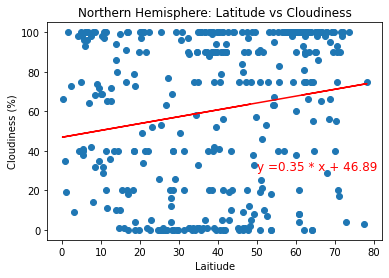

In [23]:
#Plotting Northern hemisphere scatterplot
plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Laitiude")
plt.ylabel("Cloudiness (%)")

#Finding correlation value
r_value=sts.pearsonr(north_df["Lat"],north_df["Cloudiness"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=north_df["Lat"]
y=north_df["Cloudiness"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
cloud_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(50,30),fontsize=12,color="red")
plt.plot(x,cloud_predicted,color="red")

plt.show()

Southern Hemisphere: Cloudiness vs Latitude

The r-value:0.2169661155985372


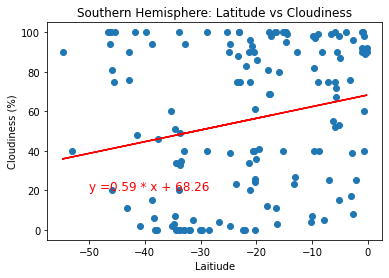

In [24]:
#Plotting southern hemisphere scatterplot
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Laitiude")
plt.ylabel("Cloudiness (%)")

#Finding correlation value
r_value=sts.pearsonr(south_df["Lat"],south_df["Cloudiness"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=south_df["Lat"]
y=south_df["Cloudiness"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
cloud_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(-50,20),fontsize=12,color="red")
plt.plot(x,cloud_predicted,color="red")

plt.show()

Northern Hemsiphere: Wind Speed vs Latitude

The r-value:0.13500713144181875


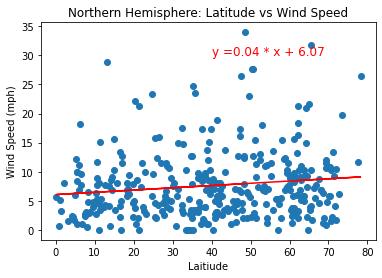

In [25]:
#Plotting Northern hemisphere scatterplot
plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Laitiude")
plt.ylabel("Wind Speed (mph)")

#Finding correlation value
r_value=sts.pearsonr(north_df["Lat"],north_df["Wind Speed"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=north_df["Lat"]
y=north_df["Wind Speed"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
wind_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(40,30),fontsize=12,color="red")
plt.plot(x,wind_predicted,color="red")

plt.show()

Southern Hemisphere: Wind Speed vs Latitude

The r-value:-0.2309468028038676


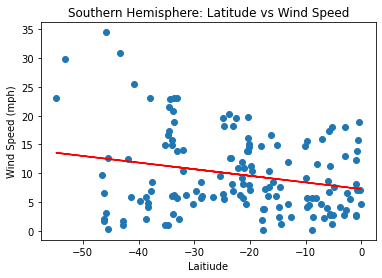

In [26]:
#Plotting southern hemisphere scatterplot
plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.title("Southern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Laitiude")
plt.ylabel("Wind Speed (mph)")

#Finding correlation value
r_value=sts.pearsonr(south_df["Lat"],south_df["Wind Speed"])
print(f"The r-value:{r_value[0]}")

#Regression line
x=south_df["Lat"]
y=south_df["Wind Speed"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x,y)
wind_predicted=x * slope +intercept
regression= f"y ={round(slope,2)} * x + {round(intercept,2)}"

plt.annotate(regression,(-30,40),fontsize=12,color="red")
plt.plot(x,wind_predicted,color="red")

plt.show()